Posiciones de los modelos segun su puntuacion:

1º KnnRegresor(k = 10496) = 54.11463189636876
2º KnnRegresor(default) = 897.5864424294
3º KnnRegresor( with GridSearchCV k= 3) = 944.4612969976668
4º LinealRegresor(default) = 1049.6153056103506
5º DecisionTreeRegressor(default) = 1102.272488393

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


In [5]:
df_train = pd.read_csv('train.csv')

df_train

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [6]:
df_test = pd.read_csv('test.csv')

df_test

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,515.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.402948,0.408526,32.924021
1,15001,752.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.558394,0.479607,39.448650
2,15002,755.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.621376,0.513172,43.955361
3,15003,447.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.388819,27.442427
4,15004,269.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.511752,0.426371,33.942014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,564.0,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.378833,0.375616,29.833158
9996,24996,598.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.392836,28.135899
9997,24997,65.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.525063,0.452144,36.415657
9998,24998,326.0,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.595713,0.492642,41.502482


In [16]:
y_test = pd.read_csv('sample_submission.csv')

y_test = y_test.drop(['id'], axis=1)

y_test

,yield
0,6009.294
1,6009.294
2,6009.294
3,6009.294
4,6009.294
...,...
9995,6009.294
9996,6009.294
9997,6009.294
9998,6009.294


In [9]:
df_train = df_train.drop(['id'], axis=1)
df_train

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [10]:
df_test = df_test.drop(['id'], axis=1)
df_test

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,515.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.402948,0.408526,32.924021
1,752.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.558394,0.479607,39.448650
2,755.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.621376,0.513172,43.955361
3,447.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.388819,27.442427
4,269.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.511752,0.426371,33.942014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,564.0,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.378833,0.375616,29.833158
9996,598.0,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.334594,0.392836,28.135899
9997,65.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.525063,0.452144,36.415657
9998,326.0,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.595713,0.492642,41.502482


In [14]:
X_train = pd.DataFrame(df_train.drop(['yield'], axis=1))


y_train = pd.DataFrame(df_train['yield'])



In [151]:
from sklearn.neighbors import KNeighborsRegressor
kneigh = KNeighborsRegressor(n_neighbors= 10496)
kneigh.fit(X_train, y_train)

y_pred = kneigh.predict(df_test)

In [152]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

54.11463189636876

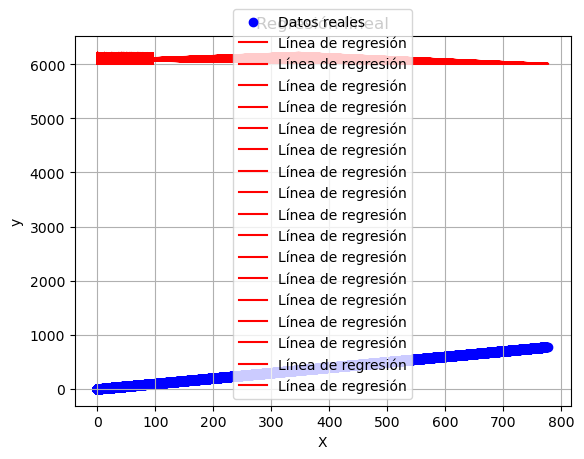

In [140]:


# Gráfico
plt.scatter(df_test, df_test, color='blue', label='Datos reales')        # puntos reales
plt.plot(df_test, y_pred, color='red', label='Línea de regresión') # línea ajustada
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión lineal')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,20)}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(df_test)

In [22]:

mean_absolute_error(y_test, y_pred2)

944.4612969976668

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred3 = reg.predict(df_test)

In [108]:
mean_absolute_error(y_test, y_pred3)

1049.6153056103506

In [135]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(random_state=100)
 
treeRegressor.fit(X_train, y_train)

y_pred4 = treeRegressor.predict(df_test)

In [134]:
mean_absolute_error(y_test, y_pred4)

1102.838812384

In [153]:
y_pred 

array([[6023.61904157],
       [6011.27044036],
       [6010.37055749],
       ...,
       [6077.74048097],
       [6192.76461296],
       [6197.60118663]])

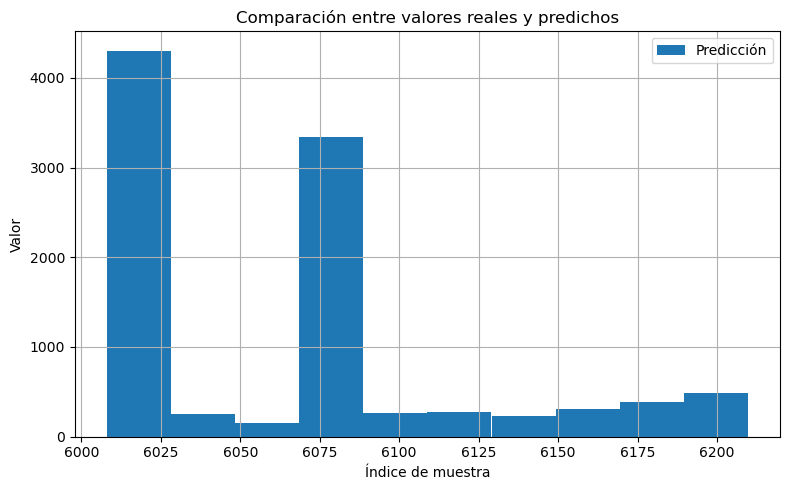

In [161]:
import matplotlib.pyplot as plt

# Ejemplo de datos (puedes reemplazarlos por los tuyos)


# Crear el gráfico
plt.figure(figsize=(8, 5))

plt.hist(y_pred, label='Predicción')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


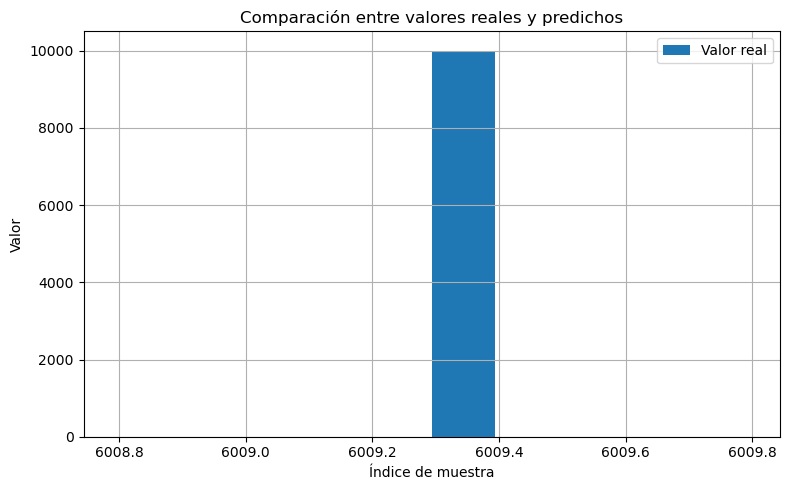

In [ ]:
# Crear el gráfico
plt.figure(figsize=(8, 5))

plt.hist(y_test, label='Valor real', )
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()